In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

from pandas import Series, DataFrame

ops.reset_default_graph()

from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/vishal/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'draw_if_interactive', 'random', 'power', 'fft', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [14]:
data_file = pd.read_csv("train.csv")
#cleaning the data set, most of the entries in ticket and cabin has NaN
data_file = data_file.drop(['Ticket','Cabin'], axis=1)
#Removing entries which have atleast on NaN in one of the feature
data_file = data_file.dropna()
data_file[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [15]:
#Converting Sex to numeric value, using lamda function
new_data_file = data_file.drop(['PassengerId','Name'], axis=1)
def to_numeric_str(var):
    if var=='male':
        return 0
    else:
        return 1
#Usage of lambda function
new_data_file['Sex_num'] = 0
new_data_file[['Sex_num']] = new_data_file[['Sex']].apply(lambda row: to_numeric_str(row['Sex']),axis=1)
new_data_file = new_data_file.drop(['Sex'],axis=1)
new_data_file[0:5]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_num
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0


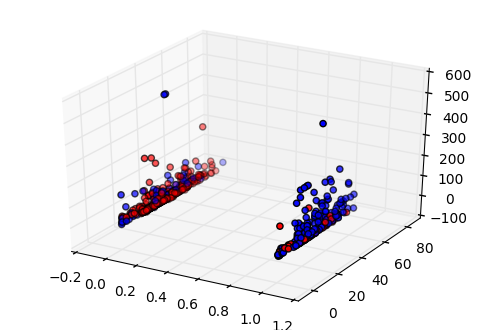

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

c =[]
m = []
for s in new_data_file['Survived']:
    if s==0:
        c.append('r')
        m.append('o')
    else:
        c.append('b')
        m.append('^')
ax.scatter(new_data_file[['Sex_num']], new_data_file[['Age']], new_data_file[['Fare']], c=c)
plt.show()